In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import glob, os
import numpy as np
import matplotlib.pyplot as plt
import datetime  as dt
import seaborn as sns

## Data Directory

In [3]:
sports = 'NBA'
season = 'reg'

In [4]:
# data folder path
data_directory = os.path.join('..','data','sports_data/{}/{}'.format(sports,season))
data_directory_saves = os.path.join( '..','data','clean_data','sports_data/{}/'.format(sports))

In [5]:
# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.csv")) 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df   = pd.concat(df_from_each_file, ignore_index=True)

In [6]:
season = 'plo'
data_directory = os.path.join('..','data','sports_data/{}/{}'.format(sports,season))

# combine all files into one df
all_files = glob.glob(os.path.join(data_directory, "*.csv")) 
df_from_each_file = (pd.read_csv(f) for f in all_files)
df_plo   = pd.concat(df_from_each_file, ignore_index=True)

## add season col to each dataframe

In [7]:
df['season'] = 'regular'
df_plo['season'] = 'playoffs'

In [8]:
df.head(2)

,G,Date,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Notes,season
0,1,"Tue, Oct 27, 2009",7:00p ET,NaN,Box Score,@,Portland Trail Blazers,L,NaN,87,96,0,1,L 1,NaN,regular
1,2,"Wed, Oct 28, 2009",7:30p ET,NaN,Box Score,@,Golden State Warriors,W,NaN,108,107,1,1,W 1,NaN,regular


In [9]:
df_plo.head(2)

,G,Date,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Notes,season
0,1,"Sun, Apr 20, 2014",9:30p ET,NaN,Box Score,NaN,Portland Trail Blazers,L,OT,120,122,0,1,L 1,NaN,playoffs
1,2,"Wed, Apr 23, 2014",9:30p ET,NaN,Box Score,NaN,Portland Trail Blazers,L,NaN,105,112,0,2,L 2,NaN,playoffs


## merge the two dataframes

In [10]:
df = df.append(df_plo)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 685 entries, 0 to 44
Data columns (total 16 columns):
G             685 non-null int64
Date          685 non-null object
Unnamed: 2    685 non-null object
Unnamed: 3    8 non-null object
Unnamed: 4    685 non-null object
Unnamed: 5    342 non-null object
Opponent      685 non-null object
Unnamed: 7    685 non-null object
Unnamed: 8    51 non-null object
Tm            685 non-null int64
Opp           685 non-null int64
W             685 non-null int64
L             685 non-null int64
Streak        685 non-null object
Notes         1 non-null object
season        685 non-null object
dtypes: int64(5), object(11)
memory usage: 91.0+ KB


In [12]:
df.head()

,G,Date,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Opponent,Unnamed: 7,Unnamed: 8,Tm,Opp,W,L,Streak,Notes,season
0,1,"Tue, Oct 27, 2009",7:00p ET,NaN,Box Score,@,Portland Trail Blazers,L,NaN,87,96,0,1,L 1,NaN,regular
1,2,"Wed, Oct 28, 2009",7:30p ET,NaN,Box Score,@,Golden State Warriors,W,NaN,108,107,1,1,W 1,NaN,regular
2,3,"Sat, Oct 31, 2009",7:30p ET,NaN,Box Score,NaN,Portland Trail Blazers,W,NaN,111,107,2,1,W 2,NaN,regular
3,4,"Mon, Nov 2, 2009",7:00p ET,NaN,Box Score,@,Utah Jazz,W,NaN,113,96,3,1,W 3,NaN,regular
4,5,"Wed, Nov 4, 2009",7:30p ET,NaN,Box Score,NaN,Los Angeles Lakers,L,OT,102,103,3,2,L 1,NaN,regular


In [13]:
df.apply(lambda x: sum(x.isnull()))

G               0
Date            0
Unnamed: 2      0
Unnamed: 3    677
Unnamed: 4      0
Unnamed: 5    343
Opponent        0
Unnamed: 7      0
Unnamed: 8    634
Tm              0
Opp             0
W               0
L               0
Streak          0
Notes         684
season          0
dtype: int64

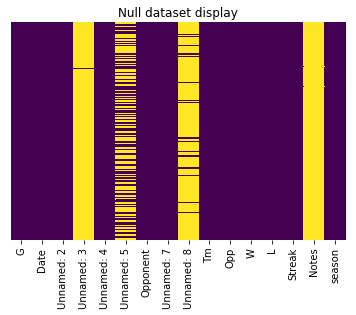

In [14]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Null dataset display')
plt.show()

## Drop columns

In [15]:
df.drop(['G',
 'Unnamed: 2',
 'Unnamed: 3',
 'Unnamed: 4',
 'Unnamed: 8',
 'W',
 'L',
 'Streak',
 'Notes'],axis=1,inplace=True)

In [16]:
df.head()

,Date,Unnamed: 5,Opponent,Unnamed: 7,Tm,Opp,season
0,"Tue, Oct 27, 2009",@,Portland Trail Blazers,L,87,96,regular
1,"Wed, Oct 28, 2009",@,Golden State Warriors,W,108,107,regular
2,"Sat, Oct 31, 2009",NaN,Portland Trail Blazers,W,111,107,regular
3,"Mon, Nov 2, 2009",@,Utah Jazz,W,113,96,regular
4,"Wed, Nov 4, 2009",NaN,Los Angeles Lakers,L,102,103,regular


## convert date column to datetime

## add home value to nan on Unnamed: 5


In [17]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)

In [18]:
df.date = pd.to_datetime(df['date'])

In [19]:
df.rename(columns={
    'unnamed: 5': 'home_away',
    'unnamed: 7': 'win_lost',
}, inplace=True)

In [20]:
df.home_away.fillna('home',inplace=True)

In [21]:
df.head()

,date,home_away,opponent,win_lost,tm,opp,season
0,2009-10-27,@,Portland Trail Blazers,L,87,96,regular
1,2009-10-28,@,Golden State Warriors,W,108,107,regular
2,2009-10-31,home,Portland Trail Blazers,W,111,107,regular
3,2009-11-02,@,Utah Jazz,W,113,96,regular
4,2009-11-04,home,Los Angeles Lakers,L,102,103,regular


## Create column called team

In [22]:
df['team'] = "Houston Rockets" 

In [23]:
df.head()

,date,home_away,opponent,win_lost,tm,opp,season,team
0,2009-10-27,@,Portland Trail Blazers,L,87,96,regular,Houston Rockets
1,2009-10-28,@,Golden State Warriors,W,108,107,regular,Houston Rockets
2,2009-10-31,home,Portland Trail Blazers,W,111,107,regular,Houston Rockets
3,2009-11-02,@,Utah Jazz,W,113,96,regular,Houston Rockets
4,2009-11-04,home,Los Angeles Lakers,L,102,103,regular,Houston Rockets


## change order

In [24]:
cols = ['team','home_away','opponent','tm','opp','win_lost','season','date']
df = df.reindex(columns=cols)

In [25]:
df.head()

,team,home_away,opponent,tm,opp,win_lost,season,date
0,Houston Rockets,@,Portland Trail Blazers,87,96,L,regular,2009-10-27
1,Houston Rockets,@,Golden State Warriors,108,107,W,regular,2009-10-28
2,Houston Rockets,home,Portland Trail Blazers,111,107,W,regular,2009-10-31
3,Houston Rockets,@,Utah Jazz,113,96,W,regular,2009-11-02
4,Houston Rockets,home,Los Angeles Lakers,102,103,L,regular,2009-11-04


## choose only home games

In [26]:
home_games = df.home_away =='home'
df = df[home_games]

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 2 to 44
Data columns (total 8 columns):
team         343 non-null object
home_away    343 non-null object
opponent     343 non-null object
tm           343 non-null int64
opp          343 non-null int64
win_lost     343 non-null object
season       343 non-null object
date         343 non-null datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 24.1+ KB


In [28]:
df.head()

,team,home_away,opponent,tm,opp,win_lost,season,date
2,Houston Rockets,home,Portland Trail Blazers,111,107,W,regular,2009-10-31
4,Houston Rockets,home,Los Angeles Lakers,102,103,L,regular,2009-11-04
5,Houston Rockets,home,Oklahoma City Thunder,105,94,W,regular,2009-11-06
7,Houston Rockets,home,Memphis Grizzlies,104,79,W,regular,2009-11-11
10,Houston Rockets,home,Phoenix Suns,105,111,L,regular,2009-11-17


## drop home_away column

In [29]:
df.drop(['home_away'],axis=1, inplace=True)

## set datetime index

In [30]:
df = df.set_index('date').sort_index(ascending=True)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 343 entries, 2009-10-31 to 2017-05-11
Data columns (total 6 columns):
team        343 non-null object
opponent    343 non-null object
tm          343 non-null int64
opp         343 non-null int64
win_lost    343 non-null object
season      343 non-null object
dtypes: int64(2), object(4)
memory usage: 18.8+ KB


In [33]:
df.head()

,team,opponent,tm,opp,win_lost,season
date,,,,,,
2009-10-31,Houston Rockets,Portland Trail Blazers,111,107,W,regular
2009-11-04,Houston Rockets,Los Angeles Lakers,102,103,L,regular
2009-11-06,Houston Rockets,Oklahoma City Thunder,105,94,W,regular
2009-11-11,Houston Rockets,Memphis Grizzlies,104,79,W,regular
2009-11-17,Houston Rockets,Phoenix Suns,105,111,L,regular


## save data

In [32]:
df.to_csv(data_directory_saves+'Rockets_2010_2017.csv')